# K-Means Clustering

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Based on the features (petal length and width and sepal length and width) we want to cluster the data into some group

- Things to keep in mind:
    - 1. Means is based on distance therefore the data should be scaled before doing any scaling
    - 2. Initialize KMeans object
    - 3. Fit and Transform on the Kmeans object

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Scaling the data:

In [14]:
std_scalar = StandardScaler()
scaled_df = std_scalar.fit_transform(df)

# Doing Clustering

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

limit_output extension: Maximum message size of 10000 exceeded with 12954 characters

In [16]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [17]:
df["cluster"] = kmeans.labels_

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df["cluster"].value_counts()

cluster
0    56
1    50
2    44
Name: count, dtype: int64

# Interpret these clusters

- In terms of sepal length:
    - cluster 1 is having a high sepal length
- In terms of petal width
    - cluster 0 is having a very low value and cluster 1 and 2 are similar
- In terms of petal length
    - cluster 1 is having a high value
    
- CLUSTER 0 -> those flowers having low petal length and low petal width.

- CLUSTER 1 and 2 are similar in terms of petal length and petal width

In [20]:
df.groupby("cluster").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.833929,2.676786,4.421429,1.435714
1,5.006000,3.428000,1.462000,0.246000
2,6.806818,3.120455,5.522727,1.981818


# Plot the results

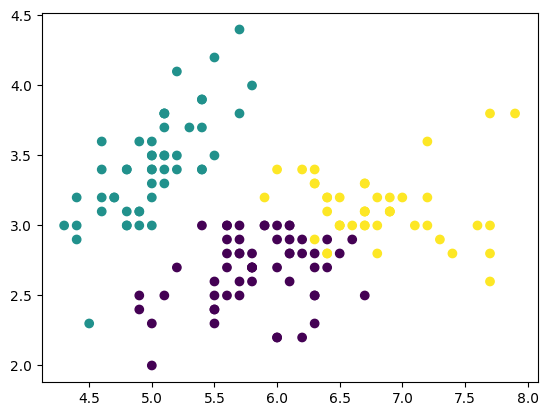

In [28]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'])

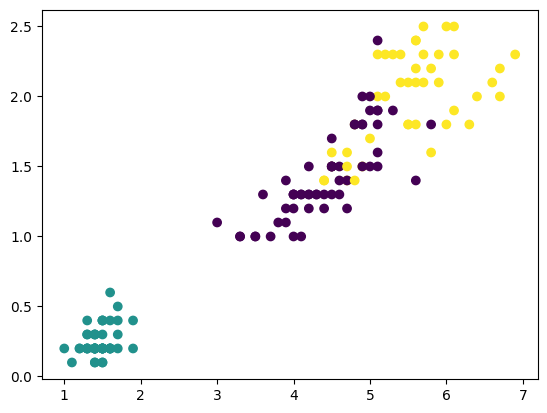

In [31]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'])
plt.show()

# How to decide value of K

## Inertia

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

limit_output extension: Maximum message size of 10000 exceeded with 12954 characters

In [34]:
kmeans.inertia_

140.90153181202442

## Silhouette_score

In [114]:
silhouette_score(scaled_df, kmeans.labels_)

0.30657641115470285

In [104]:
"""k_list = [2,3,4,5,6,7,8]
inertia_list, sil_score_list = [], []
for i in k_list:
    kmeans = KMeans (n_clusters=i)
    kmeans.fit(scaled_df)
    inertia_list.append(kmeans.inertia_)
    sil_score_list.append(silhouette_score(scaled_df, kmeans.labels_))
    print(f"k = {i}, inertia = {kmeans.inertia_}, silhouette_score = {silhouette_score(scaled_df, kmeans.labels_)}")
"""

'k_list = [2,3,4,5,6,7,8]\ninertia_list, sil_score_list = [], []\nfor i in k_list:\n    kmeans = KMeans (n_clusters=i)\n    kmeans.fit(scaled_df)\n    inertia_list.append(kmeans.inertia_)\n    sil_score_list.append(silhouette_score(scaled_df, kmeans.labels_))\n    print(f"k = {i}, inertia = {kmeans.inertia_}, silhouette_score = {silhouette_score(scaled_df, kmeans.labels_)}")\n'

In [112]:
k_list = [1, 2,3,4,5,6,7,8]
inertia_list, sil_score_list = [], []

for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia_list.append(kmeans.inertia_)
    if k==1 :
        sil_score_list.append (np.nan)
        print(f"For k = {k}, inertia (WCSS) = {kmeans.inertia_}, No silhouette_score for k = 1")
    else:
        sil_score_list.append(silhouette_score(scaled_df, kmeans.labels_))
        print(f"For k = {k}, inertia (WCSS) = {kmeans.inertia_}, silhouette_score  = {silhouette_score(scaled_df, kmeans.labels_)}")
    
    

For k = 1, inertia (WCSS) = 600.0000000000001, No silhouette_score for k = 1
For k = 2, inertia (WCSS) = 222.36170496502305, silhouette_score  = 0.5817500491982808
For k = 3, inertia (WCSS) = 140.0327527742865, silhouette_score  = 0.4630420362927047
For k = 4, inertia (WCSS) = 114.62685984300722, silhouette_score  = 0.41308512352502325
For k = 5, inertia (WCSS) = 90.92720535557234, silhouette_score  = 0.3423633957670477
For k = 6, inertia (WCSS) = 96.93804570298515, silhouette_score  = 0.3699680249510682
For k = 7, inertia (WCSS) = 72.7525917963284, silhouette_score  = 0.33122479081671985
For k = 8, inertia (WCSS) = 69.10409255229578, silhouette_score  = 0.30657641115470285


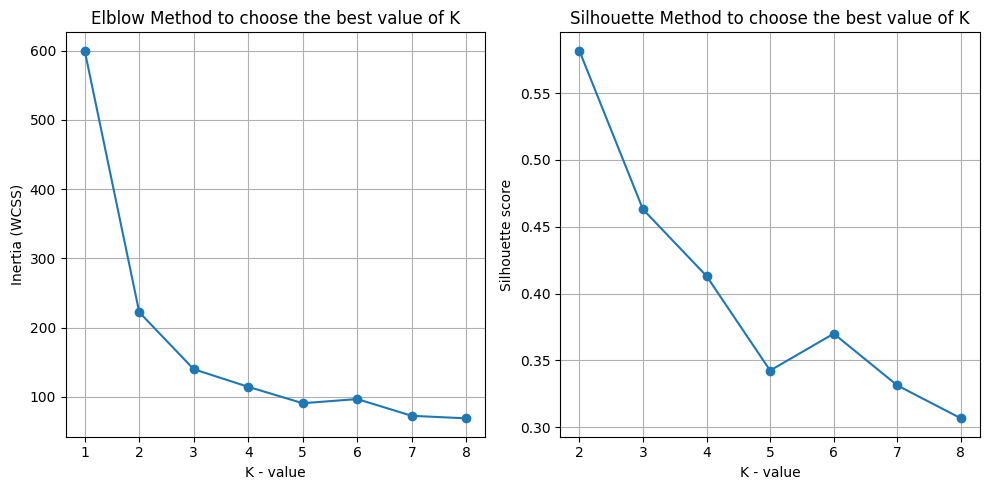

In [113]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(k_list, inertia_list, marker='o')
plt.title("Elblow Method to choose the best value of K")
plt.xlabel("K - value")
plt.ylabel("Inertia (WCSS)")
plt.grid()


plt.subplot(122)
plt.plot(k_list,sil_score_list, marker='o')
plt.title("Silhouette Method to choose the best value of K")
plt.xlabel("K - value")
plt.ylabel("Silhouette score")
plt.grid()
plt.tight_layout()

- We can observe an elbow at values 2 and 3. 2 and 3 can be good values for k
- For silhouette score, we want the values to be closer to 1. Higher value of silhouette score indicates better clustering.

- Based the the plot above, we can decide the the correct value of K for this dataset is 2.

# Analysing the clusters

- We need to understand what is the meaning ( business sense ) of each cluster
- We need to describe the properties / characteristics of each cluster